In [244]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read Data

In [245]:
# Dataset required specification of the delimiter ;
lol_df = pd.read_csv("League_of_Legends_Champion_Stats_12.1.csv", delimiter=";")

Inspect Dataset

In [246]:
print(lol_df.head())
print(lol_df.info())

     Name     Class Role Tier  Score  Trend   Win %  Role % Pick %   Ban %  \
0  Aatrox   Fighter  TOP    A  58.25   6.52  49.97%  94.62%  4.43%   2.03%   
1    Ahri      Mage  MID    A  53.21  -0.24  49.93%  93.47%  4.62%   1.04%   
2   Akali  Assassin  MID    S  65.30   6.51  48.59%  65.65%  8.16%  12.88%   
3   Akali  Assassin  TOP    A  57.87   3.34  48.57%  34.06%  4.24%  12.88%   
4  Akshan  Marksman  MID    S  59.85   0.65  51.46%  58.01%  4.83%  21.91%   

    KDA  
0  1.97  
1  2.56  
2  2.34  
3  2.04  
4  2.23  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    232 non-null    object 
 1   Class   231 non-null    object 
 2   Role    232 non-null    object 
 3   Tier    232 non-null    object 
 4   Score   232 non-null    float64
 5   Trend   232 non-null    float64
 6   Win %   232 non-null    object 
 7   Role %  232 non-null    obje

Data Cleaning

In [247]:
# Remove %, and convert percent columns from objects to float
cols = ["Win %","Role %", "Pick %", "Ban %"]
lol_df[cols] = lol_df[cols].apply(lambda x: x.str.strip('% \n\t')).astype(float)

lol_df['Tier'].replace(to_replace=('God','S','A','B','C','D'), value=(6, 5, 4, 3, 2, 1), inplace=True)

# Remove unnecessary columns.
lol_df.drop(["Name","Role", 'Role %', "Score","Trend"], axis=1, inplace=True)
print(lol_df)

        Class  Tier  Win %  Pick %  Ban %   KDA
0     Fighter     4  49.97    4.43   2.03  1.97
1        Mage     4  49.93    4.62   1.04  2.56
2    Assassin     5  48.59    8.16  12.88  2.34
3    Assassin     4  48.57    4.24  12.88  2.04
4    Marksman     5  51.46    4.83  21.91  2.23
..        ...   ...    ...     ...    ...   ...
227      Mage     2  48.37    0.86   0.60  2.36
228   Support     4  54.19    0.56   1.40  3.46
229   Support     4  50.83    3.38   1.40  3.03
230      Mage     4  49.84    3.62   1.41  2.58
231      Mage     4  52.18    3.85   1.96  2.13

[232 rows x 6 columns]


Visualize Data

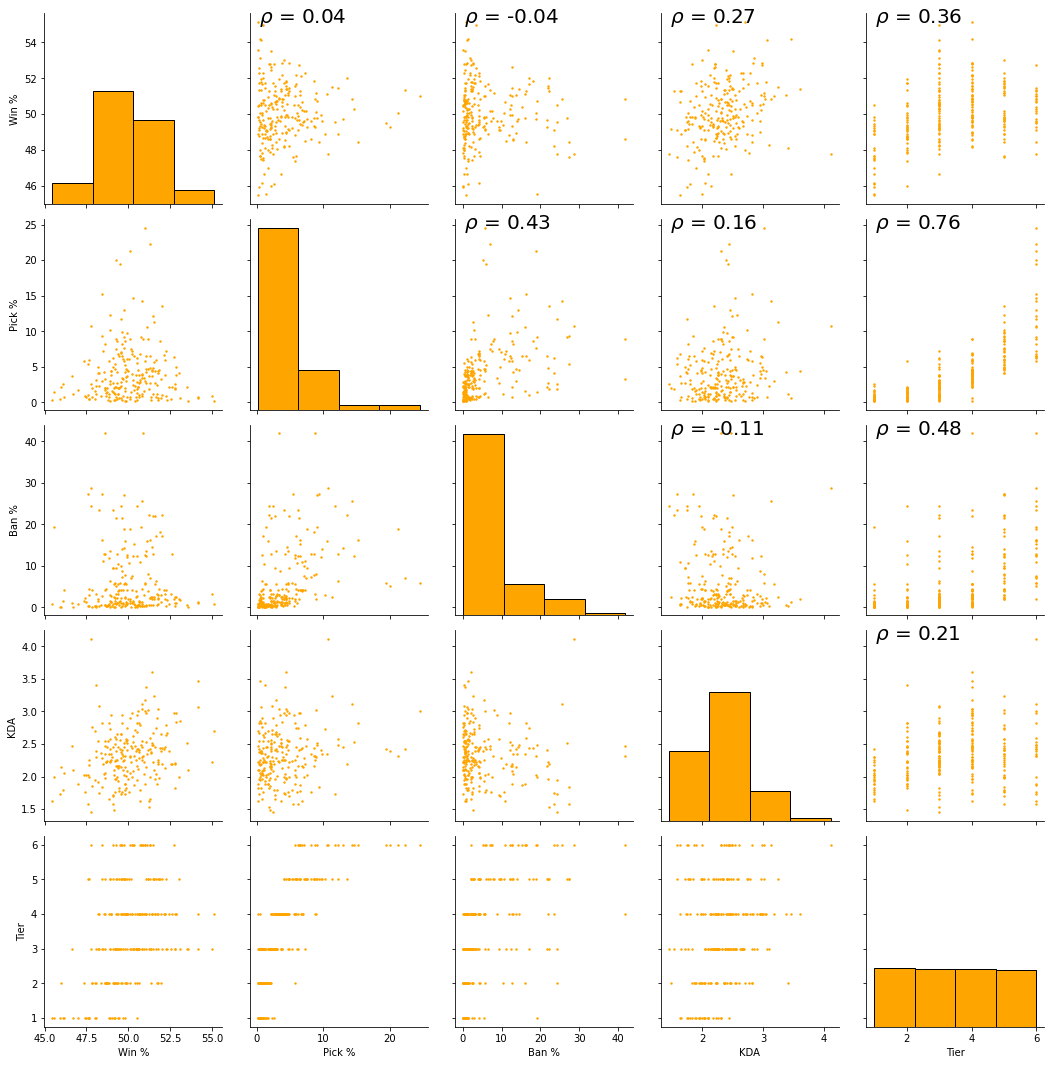

In [248]:

def pearson_correlation(x, y, **kwags):

    # Calculate Pearson Correlation
    coef = np.corrcoef(x,y)[0][1]

    # Make the labe
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca() # Identifies instance of plot
    ax.annotate(label, xy = (0.05, 0.95), size=20, xycoords = ax.transAxes)

grid = sns.PairGrid(data=lol_df, vars= ["Win %", "Pick %", "Ban %", "KDA", "Tier"], height=3)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = "Orange", s=2)
grid = grid.map_upper(pearson_correlation)
grid = grid.map_lower(plt.scatter, color = "Orange", s=2)
grid = grid.map_diag(plt.hist, bins = 4, edgecolor='k', color='Orange')
plt.show()